<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%80%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [1]:
%%capture
!pip install rasterio matplotlib numpy geopandas shapely rasterio folium leafmap

In [2]:
import rasterio

dem_path = "dem_90m.tif"
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)
    dem_meta = src.meta
    print("Метаданные растр:")
    print(dem_meta)

Метаданные растр:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [3]:
with rasterio.open(dem_path) as src:
    print(f"CRS: {src.crs}")
    print(f"Разрешение: {src.res}")
    print(f"Границы: {src.bounds}")
    print(f"Количество каналов: {src.count}")
    print(f"Тип данных: {src.dtypes[0]}")

CRS: EPSG:3857
Разрешение: (90.0, 89.99579177642138)
Границы: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)
Количество каналов: 1
Тип данных: int16


3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [4]:
with rasterio.open(dem_path) as src:
    print(f"Ширина: {src.width}, Высота: {src.height}")
    print(f"Тип данных пикселей: {src.dtypes[0]}")

Ширина: 4269, Высота: 3113
Тип данных пикселей: int16


---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


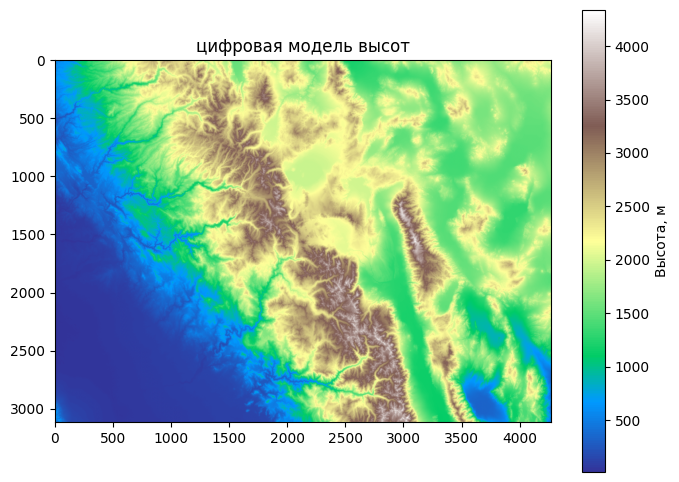

In [6]:
import matplotlib.pyplot as plt

with rasterio.open(dem_path) as src:
    dem = src.read(1)

plt.figure(figsize=(8, 6))
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Высота, м')
plt.title('цифровая модель высот')
plt.show()

2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


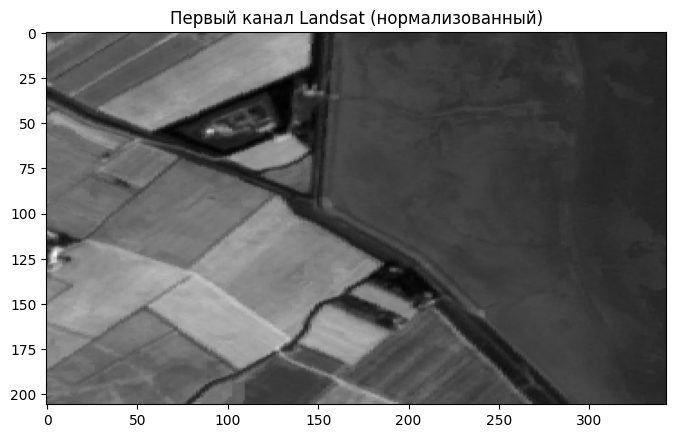

In [22]:
landsat_path = "cog.tif"

with rasterio.open(landsat_path) as src:
    band1 = src.read(1)

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    return (band - band_min) / (band_max - band_min)

plt.figure(figsize=(8, 6))
plt.imshow(normalize(band1), cmap='gray')
plt.title('Первый канал Landsat (нормализованный)')
plt.show()

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

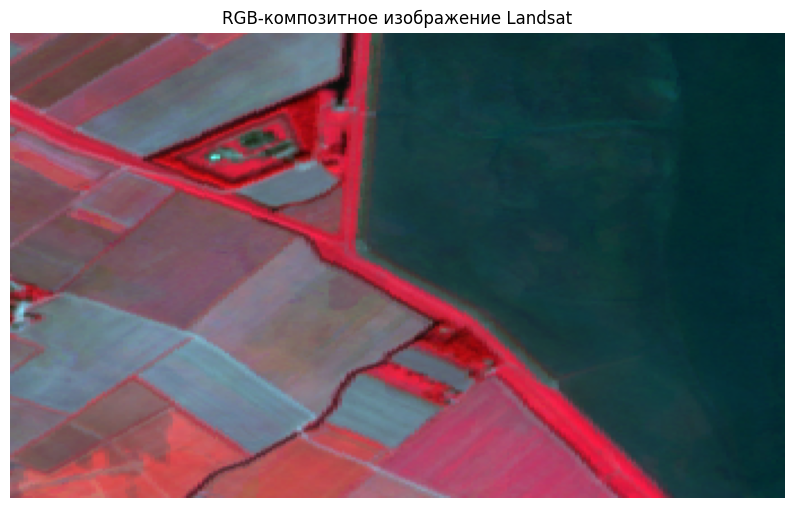

In [23]:
import numpy as np

with rasterio.open(landsat_path) as src:
    red = src.read(4)
    green = src.read(3)
    blue = src.read(2)

red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

rgb = np.stack([red_n, green_n, blue_n], axis=0)

rgb = np.moveaxis(rgb, 0, -1)

plt.figure(figsize=(10, 8))
plt.imshow(rgb)
plt.title('RGB-композитное изображение Landsat')
plt.axis('off')
plt.show()

---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


Ширина: 343, Высота: 206


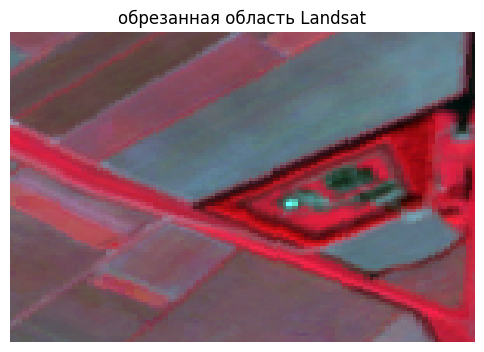

In [24]:
with rasterio.open(landsat_path) as src:
    print(f"Ширина: {src.width}, Высота: {src.height}")
    subset = src.read(window=((0, 100), (0, 150)))
subset_rgb = np.stack([
    normalize(subset[3]),
    normalize(subset[2]),
    normalize(subset[1])
], axis=-1)

plt.figure(figsize=(6, 6))
plt.imshow(subset_rgb)
plt.title('обрезанная область Landsat')
plt.axis('off')
plt.show()

2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

Ширина: 343, Высота: 206


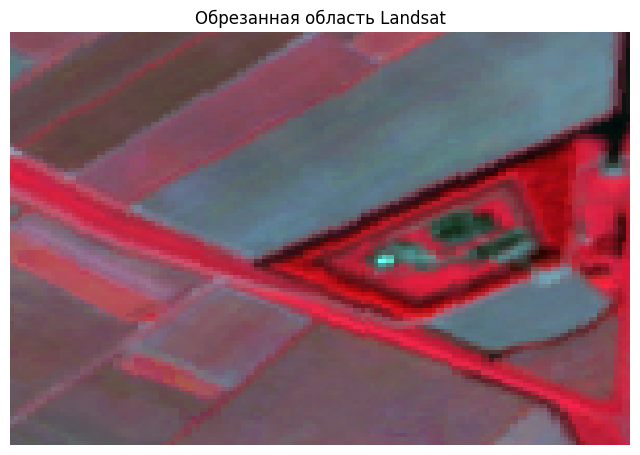

In [27]:
landsat_path = "cog.tif"

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

with rasterio.open(landsat_path) as src:
    print(f"Ширина: {src.width}, Высота: {src.height}")

    subset = src.read(window=((0, 100), (0, 150)))

subset_rgb = np.stack([
      normalize(subset[3]),
      normalize(subset[2]),
      normalize(subset[1])
  ], axis=-1)

plt.figure(figsize=(8, 8))
plt.imshow(subset_rgb)
plt.title('Обрезанная область Landsat')
plt.axis('off')
plt.show()


3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [29]:
landsat_path = "cog.tif"

with rasterio.open(landsat_path) as src:
    print(f"Ширина: {src.width}, Высота: {src.height}")
    window = ((0, 100), (0, 150))
    subset = src.read(window=window)
    profile = src.profile
    transform = src.window_transform(window)
    profile.update(
        width=subset.shape[2],
        height=subset.shape[1],
        transform=transform
    )
    with rasterio.open('clipped_multispectral.tif', 'w', **profile) as dst:
        dst.write(subset)

print("Файл сохранён как clipped_multispectral.tif")

Ширина: 343, Высота: 206
Файл сохранён как clipped_multispectral.tif


---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [31]:
with rasterio.open(landsat_path) as src:
    green_band = src.read(2).astype('float32')
    nir_band = src.read(4).astype('float32')

2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [33]:
np.seterr(divide='ignore', invalid='ignore')

ndwi = (green_band - nir_band) / (green_band + nir_band)
print(ndwi)

[[-0.3504988  -0.35644785 -0.35746607 ...  0.46679574  0.46465233
   0.46465233]
 [-0.35062808 -0.35220468 -0.35652885 ...  0.47569445  0.47475272
   0.47190148]
 [-0.34629604 -0.35875782 -0.36137876 ...  0.4730702   0.47200623
   0.46624458]
 ...
 [-0.36545455 -0.36578324 -0.3609232  ...  0.42672879  0.4226429
   0.42256075]
 [-0.36067453 -0.346015   -0.35355502 ...  0.42785174  0.42681605
   0.42650253]
 [-0.34511545 -0.35083532 -0.37997818 ...  0.43665037  0.43136787
   0.4295977 ]]


3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


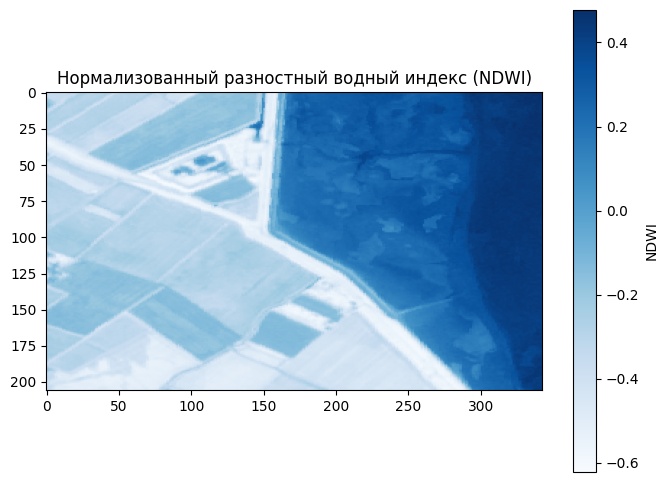

In [34]:
plt.figure(figsize=(8, 6))
plt.imshow(ndwi, cmap='Blues')
plt.colorbar(label='NDWI')
plt.title('Нормализованный разностный водный индекс (NDWI)')
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [36]:
landsat_path = "cog.tif"

with rasterio.open(landsat_path) as src:
    green_band = src.read(2).astype('float32')
    nir_band = src.read(4).astype('float32')
    np.seterr(divide='ignore', invalid='ignore')
    ndwi = (green_band - nir_band) / (green_band + nir_band)
    profile = src.profile
    profile.update(
        count=1,
        dtype=rasterio.float32,
    )
    with rasterio.open('ndwi.tif', 'w', **profile) as dst:
        dst.write(ndwi, 1)

print("NDWI сохранён как ndwi.tif")

NDWI сохранён как ndwi.tif


---



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [37]:
from rasterio.warp import reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open(dem_path) as src:
    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)

    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('reprojected_dem.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

2. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

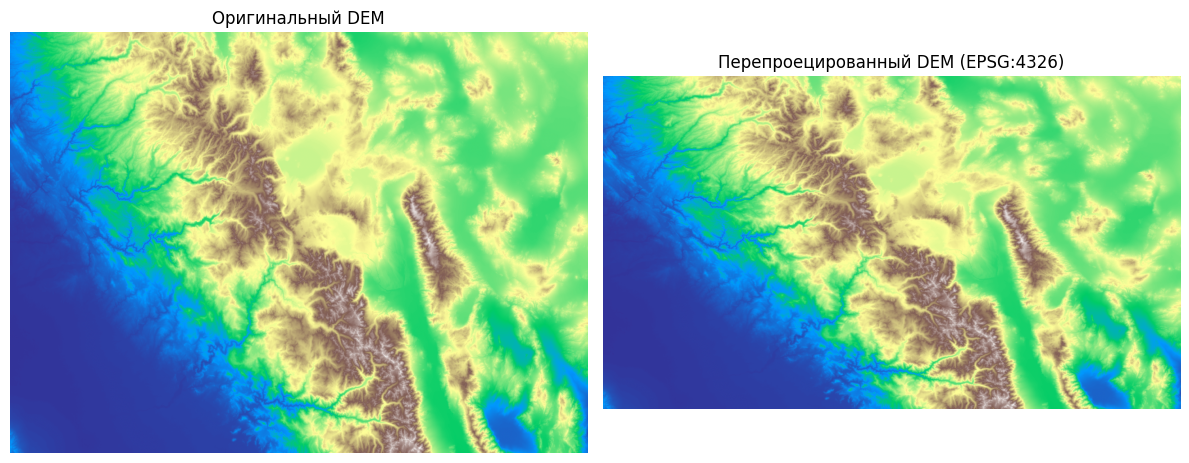

In [38]:
with rasterio.open(dem_path) as src:
    original = src.read(1)

with rasterio.open('reprojected_dem.tif') as src:
    reprojected = src.read(1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original, cmap='terrain')
axes[0].set_title('Оригинальный DEM')

axes[1].imshow(reprojected, cmap='terrain')
axes[1].set_title('Перепроецированный DEM (EPSG:4326)')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

---